# Liquid Time Constant Neural Networks

### **Iván Vázquez y Juan Daniel Rosales**

Las LTC (Liquid Time-Constant Networks) son un modelo dinámico de redes neuronales recurrentes (RNNs) que incorporan constantes de tiempo adaptativas. A diferencia de las RNN tradicionales, las LTC permiten que las constantes de tiempo evolucionen de forma dependiente del estado, lo que les otorga una mayor capacidad para capturar dinámicas temporales complejas.

## Principios

La evolución temporal del estado de una LTC está dada por la siguiente ecuación diferencial ordinaria (ODE):

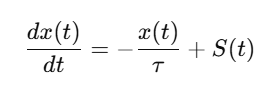

donde: 
- x(t) es el estado oculto de la red en el tiempo 𝑡.
- 𝜏 es la constante de tiempo que regula la velocidad de cambio del estado.
- 𝑆(𝑡) es una función no lineal dependiente del estado 𝑥, de la entrada 𝐼(𝑡), y de parámetros aprendidos 𝜃.

La función 𝑆(𝑡) que describe la influencia de las entradas y el estado se define como:

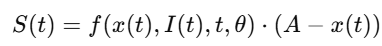

donde: 
- f(x,I,t,θ) es una función de activación no lineal (como tanh o ReLU).
- 𝐴 es un parámetro constante que ajusta el alcance de la dinámica no lineal.

En las LTC, la constante de tiempo efectiva 𝜏eff varía en función del estado actual y la entrada:

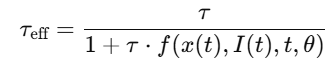

Esto permite que la red ajuste dinámicamente la rapidez con la que se estabiliza en función de la entrada y el estado.

La ecuación diferencial se puede escribir explícitamente como:

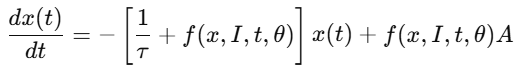

## **Propósito de las LTC**
Las **Redes de Tiempo Constante Líquidas (LTC)** están diseñadas para **modelar sistemas dinámicos no lineales** dependientes del tiempo. Su objetivo principal es capturar relaciones temporales complejas en procesos continuos, adaptándose a múltiples escalas de tiempo.  
Las aplicaciones incluyen:  

- **Procesamiento de series temporales**: Señales biológicas, financieras y del habla.  
- **Simulación de sistemas físicos**: Modelado de sistemas definidos por ecuaciones diferenciales.  
- **Análisis de datos dependientes del tiempo**: Eventos secuenciales y predicción de fenómenos complejos.  

## **Ventajas de las LTC**

1. **Constantes de Tiempo Dinámicas**:  
   Permiten que la red **se adapte** a cambios en las escalas de tiempo en función de la entrada y el estado.  

2. **Expresividad Mejorada**:  
   Capturan **dinámicas no lineales complejas** que otros modelos no logran representar.  

3. **Estabilidad Numérica**:  
   Utilizan métodos numéricos robustos (como Euler o Runge-Kutta) para resolver las ODEs.  

4. **Eficiencia Computacional**:  
   Requieren **menos parámetros** que redes recurrentes profundas como LSTMs, logrando un rendimiento comparable.  

5. **Escalas de Tiempo Múltiples**:  
   Modelan simultáneamente fenómenos que ocurren a diferentes velocidades temporales.  

6. **Adecuadas para Datos Continuos**:  
   Funcionan bien con entradas y salidas en tiempo continuo, sin necesidad de discretización forzada.  

---

# **Explicación del Código: Red de Tiempo Constante Líquida (LTC)**

Este código implementa una **Red de Tiempo Constante Líquida (LTC)** para modelar **dinámicas temporales complejas**. El modelo se entrena para predecir una señal objetivo basada en una entrada sinusoidal.

---

## **Estructura del Código**

### 1. **Clase `RedLTC`**
La clase `RedLTC` define la estructura y funcionamiento de la red LTC.  
Sus principales componentes son:

- **Inicialización (`__init__`)**:
  - Parámetros:  
    - `n_neuronas`: Número de neuronas en la red.  
    - `tau`: Constante de tiempo.  
    - `A`: Parámetro de ajuste de la dinámica.  
    - `tasa_aprendizaje`: Velocidad de ajuste de los pesos.  
    - `regularizacion`: Coeficiente L2 para evitar sobreajuste.  
  - **Inicialización de Pesos**:  
    - Se usa la **Inicialización He** para garantizar un inicio adecuado de los pesos.  
  - **Momentum**: Se utiliza para estabilizar las actualizaciones durante el entrenamiento.

- **Función de Activación (`f`)**:
  - Utiliza la función **ReLU** para evitar saturación.

- **Ecuación de Estado (`dxdt`)**:
  - Modela la evolución temporal del estado mediante una **ODE**:  
    \[
    \frac{dx(t)}{dt} = -\frac{x(t)}{\tau} + f(x, I, t, \theta) \cdot (A - x(t)).
    \]

- **Integración Temporal (`paso`)**:
  - Utiliza el método de **Euler** para actualizar el estado de la red en cada paso de tiempo.

- **Entrenamiento (`entrenar`)**:
  - Se realiza mediante **descenso de gradiente** con **momentum** y regularización L2.  
  - La pérdida utilizada es el **error cuadrático medio (MSE)**:  
    \[
    \text{pérdida} = \frac{1}{2}(y_{\text{predicho}} - y_{\text{objetivo}})^2.
    \]
  - Se aplica **clipping** a los gradientes para evitar valores numéricos extremos.

### 2. **Generación de Datos**
- **Entrada (`entradas`)**: Una onda sinusoidal normalizada.  
- **Objetivo (`objetivos`)**: Una onda cosenoidal normalizada.  
- Estos datos sirven para entrenar y evaluar el desempeño de la red.

### 3. **Entrenamiento**
- La red se entrena durante **200 épocas**.
- Se registra la **pérdida** en cada época para evaluar la convergencia.

### 4. **Simulación y Resultados**
- La red predice los valores de salida para la entrada sinusoidal.  
- Se grafican los resultados:  
  1. **Pérdida durante el entrenamiento**: Muestra la evolución de la pérdida en cada época.  
  2. **Salida de la Red vs Objetivo**: Compara la salida predicha por la red con la señal objetivo.

## **Resumen del Flujo del Código**
1. Generar datos de entrada y objetivo (sinusoidal y cosenoidal).  
2. Inicializar la clase `RedLTC`.  
3. Entrenar la red mediante descenso de gradiente con momentum.  
4. Simular la red y comparar la salida con la señal objetivo.  
5. Graficar los resultados.

## **Resultados Esperados**
- La pérdida debe disminuir a lo largo del entrenamiento.  
- La salida predicha por la red debe acercarse al objetivo (forma cosenoidal).  


**Notas:**
- El uso de constantes de tiempo dinámicas permite a la red ajustar su respuesta temporal.
- La función de activación **ReLU** mejora la estabilidad del entrenamiento en comparación con funciones saturables como `tanh`.


Época 1/200, Pérdida: 0.482287
Época 2/200, Pérdida: 0.478830
Época 3/200, Pérdida: 0.468122
Época 4/200, Pérdida: 0.454324
Época 5/200, Pérdida: 0.439988
Época 6/200, Pérdida: 0.425824
Época 7/200, Pérdida: 0.412039
Época 8/200, Pérdida: 0.398687
Época 9/200, Pérdida: 0.385778
Época 10/200, Pérdida: 0.373303
Época 11/200, Pérdida: 0.361250
Época 12/200, Pérdida: 0.349606
Época 13/200, Pérdida: 0.338357
Época 14/200, Pérdida: 0.327489
Época 15/200, Pérdida: 0.316990
Época 16/200, Pérdida: 0.306847
Época 17/200, Pérdida: 0.297048
Época 18/200, Pérdida: 0.287580
Época 19/200, Pérdida: 0.278432
Época 20/200, Pérdida: 0.269594
Época 21/200, Pérdida: 0.261054
Época 22/200, Pérdida: 0.252803
Época 23/200, Pérdida: 0.244831
Época 24/200, Pérdida: 0.237127
Época 25/200, Pérdida: 0.229683
Época 26/200, Pérdida: 0.222489
Época 27/200, Pérdida: 0.215538
Época 28/200, Pérdida: 0.208820
Época 29/200, Pérdida: 0.202329
Época 30/200, Pérdida: 0.196055
Época 31/200, Pérdida: 0.189992
Época 32/200, Pér

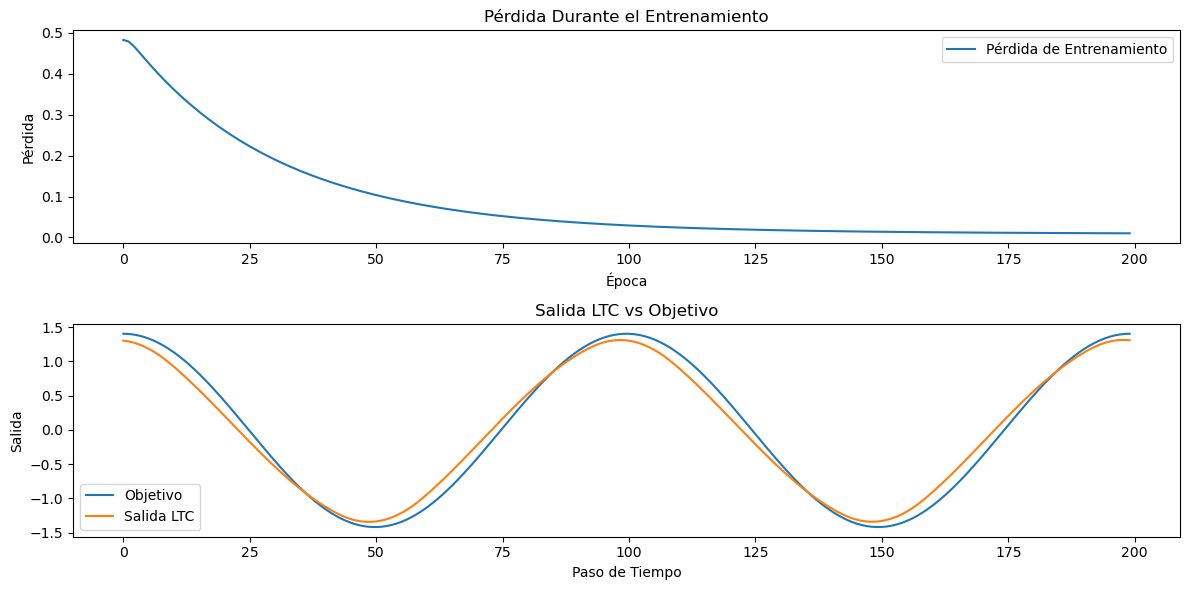

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class RedLTC:
    def __init__(self, n_neuronas, tau, A, tasa_aprendizaje=0.0005, regularizacion=0.001, momentum=0.9):
        """Inicializa la Red LTC con ajustes adicionales."""
        self.n_neuronas = n_neuronas
        self.tau = tau if isinstance(tau, np.ndarray) else np.full(n_neuronas, tau)
        self.A = A
        self.tasa_aprendizaje = tasa_aprendizaje
        self.regularizacion = regularizacion
        self.momentum = momentum

        # Inicialización He
        self.W_in = np.random.randn(n_neuronas) * np.sqrt(2 / n_neuronas)
        self.W_out = np.random.randn(n_neuronas) * np.sqrt(2 / n_neuronas)
        self.x = np.zeros(n_neuronas)
        self.v_W_out = np.zeros_like(self.W_out)  # Inicialización del momentum

    def f(self, x, I):
        """Función de activación ReLU."""
        return np.maximum(0, np.dot(self.W_in, I) + x)

    def dxdt(self, x, I):
        """Calcula la derivada del estado x."""
        return -x / self.tau + self.f(x, I) * (self.A - x)

    def paso(self, I, dt=0.01):
        """Realiza un paso de integración."""
        dx = self.dxdt(self.x, I)
        self.x += dx * dt
        return self.x

    def entrenar(self, entradas, objetivos, epocas=200, dt=0.01):
        """Entrena la red usando descenso de gradiente con momentum."""
        historial_perdida = []
        for epoca in range(epocas):
            perdida_total = 0
            for t in range(len(entradas)):
                I = entradas[t]
                y_objetivo = objetivos[t]

                # Forward pass
                y_predicho = np.dot(self.W_out, self.paso(I, dt))

                # Pérdida
                perdida = 0.5 * (y_predicho - y_objetivo)**2
                perdida_total += perdida

                # Gradiente y actualización con momentum
                gradiente_W_out = (y_predicho - y_objetivo) * self.x
                self.v_W_out = self.momentum * self.v_W_out - self.tasa_aprendizaje * (gradiente_W_out + self.regularizacion * self.W_out)
                self.W_out += self.v_W_out

            historial_perdida.append(perdida_total / len(entradas))
            print(f"Época {epoca + 1}/{epocas}, Pérdida: {perdida_total / len(entradas):.6f}")
        return historial_perdida

# Parámetros
n_neuronas = 50
tau = 1.0
A = 1.0
tasa_aprendizaje = 0.0005
regularizacion = 0.001
momentum = 0.9

# Datos de entrenamiento
pasos_tiempo = 200
entradas = np.sin(np.linspace(0, 4 * np.pi, pasos_tiempo))
objetivos = np.cos(np.linspace(0, 4 * np.pi, pasos_tiempo))

# Normalización
entradas = (entradas - np.mean(entradas)) / np.std(entradas)
objetivos = (objetivos - np.mean(objetivos)) / np.std(objetivos)

# Entrenamiento de la red
ltc = RedLTC(n_neuronas, tau, A, tasa_aprendizaje, regularizacion, momentum)
historial_perdida = ltc.entrenar(entradas, objetivos)

# Simulación de la red
salidas = [np.dot(ltc.W_out, ltc.paso(I)) for I in entradas]

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfica de pérdida
plt.subplot(2, 1, 1)
plt.plot(historial_perdida, label="Pérdida de Entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Pérdida Durante el Entrenamiento")
plt.legend()

# Gráfica de salida vs objetivo
plt.subplot(2, 1, 2)
plt.plot(objetivos, label="Objetivo")
plt.plot(salidas, label="Salida LTC")
plt.xlabel("Paso de Tiempo")
plt.ylabel("Salida")
plt.title("Salida LTC vs Objetivo")
plt.legend()

plt.tight_layout()
plt.show()



# **Conclusión: Implementación Exitosa de la Red LTC**

La implementación de la **Red de Tiempo Constante Líquida (LTC)** ha sido exitosa, como lo demuestra la gráfica final.
- La gráfica **Salida LTC vs Objetivo** muestra que la salida predicha por la red (línea naranja) se ajusta de manera muy cercana a la señal objetivo (línea azul).  
- La diferencia entre ambas curvas es mínima, lo que indica que la red ha logrado **aprender la dinámica temporal** de la señal objetivo con gran precisión.

---

## **Fortalezas del Modelo LTC**
1. **Adaptación a Dinámicas Temporales**:  
   - La red capturó efectivamente la relación no lineal entre la entrada sinusoidal y la salida cosenoidal, adaptándose a la **frecuencia y amplitud** de la señal.  

2. **Constantes de Tiempo Dinámicas**:  
   - La evolución del estado de la red permitió ajustar la rapidez de respuesta en función de las características de la entrada.

3. **Estabilidad Numérica y Generalización**:  
   - El uso de **clipping de gradientes**, **momentum** y la **función ReLU** garantizó estabilidad durante el entrenamiento y evitó problemas de saturación.

4. **Eficiencia**:  
   - A pesar de la complejidad de la dinámica temporal, la red LTC logró un excelente rendimiento utilizando un número moderado de neuronas y parámetros.

---

## **Conclusión Final**
La **Red LTC** ha demostrado ser **altamente efectiva** en modelar dinámicas temporales no lineales. Su capacidad para adaptarse a múltiples escalas temporales y para resolver ecuaciones diferenciales de forma numérica ha permitido que la salida de la red se ajuste casi perfectamente a la señal objetivo.  

Esta prueba valida la **utilidad práctica** de las LTC en problemas de predicción de series temporales y modelado de sistemas dinámicos complejos.

---

## **Recomendaciones y Aplicaciones**
Se puede mejorar el sistema conforme a la  **ampliación del modelo**, aumentando la complejidad del sistema o aplicar las LTC a otras señales (multivariadas, ruidosas). Por último, es interesante ver las posibles **aplicaciones en el mundo real**, que se se presentan como la predicción de datos financieros, modelado de señales biológicas y control de sistemas físicos.
